In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sidetable
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [2]:
df_bike = pd.read_csv('bikes.csv', index_col=0)
df_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


Cambiamos la columna 'dteday' a formato datetime, que responde con mes-día-año

In [3]:
df_bike['dteday'] = df_bike['dteday'].apply(pd.to_datetime)

In [4]:
type(df_bike['dteday'][0].month)            #.month para sacar el mes de  la columna en formato datetime (magia de Ana)

int

In [5]:
def meses(x):
    a = x.month

    if  a >= 1 and a<=3:
        return 'winter'
    elif a >= 4 and a<=6:
        return 'spring'
    elif a >= 7 and a<=9:
        return 'summer'
    else:
        return 'autumn'

In [6]:
df_bike['season_2'] = df_bike['dteday'].apply(meses)

In [7]:
df_bike.sample(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2
270,271,2018-09-28,winter,0,9,0,3,1,2,26.035000,28.757900,84.8750,9.958143,480,3427,3907,summer
22,23,2018-01-23,spring,0,1,0,0,0,1,3.957390,4.941955,43.6522,16.522200,150,836,986,winter
324,325,2018-11-21,winter,0,11,0,1,1,3,18.347500,22.253100,91.0000,9.249618,220,2545,2765,autumn
161,162,2018-11-06,summer,0,6,0,6,0,1,29.725000,33.901900,65.4583,10.374950,1729,3237,4966,autumn
713,714,2019-12-15,winter,1,12,0,6,0,1,13.290847,16.919150,65.0417,7.125450,767,4280,5047,autumn
100,101,2018-11-04,summer,0,4,0,1,1,2,24.421732,28.260850,71.6956,21.739758,855,2493,3348,autumn
621,622,2019-09-14,autumn,1,9,0,5,1,1,25.966653,29.704150,67.2500,6.958821,1379,6630,8009,summer
553,554,2019-08-07,autumn,1,7,0,0,0,1,33.722500,39.519800,57.3750,8.417143,1203,3469,4672,summer
605,606,2019-08-29,autumn,1,8,0,3,1,1,28.085000,31.786650,55.2083,7.541654,1177,6520,7697,summer
559,560,2019-07-14,autumn,1,7,0,6,0,2,28.836653,33.302100,69.9167,9.626493,2355,4614,6969,summer


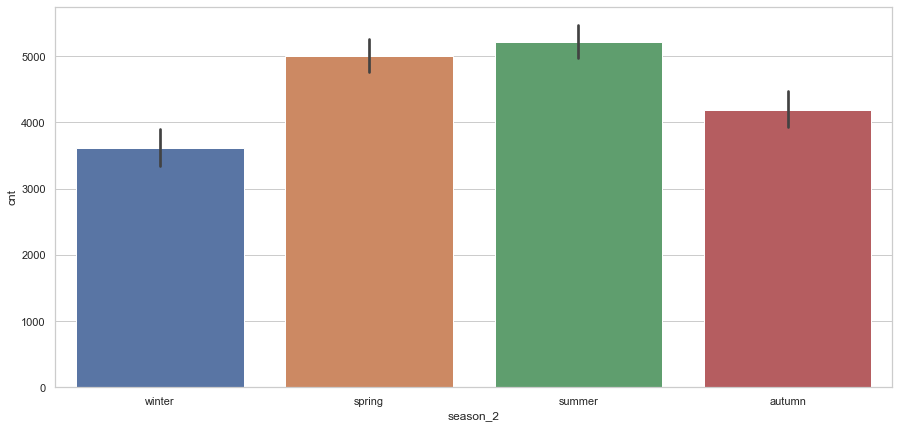

In [8]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season_2", y="cnt", data=df_bike)

 - Las estaciones en las que se utiliza más el servicio de bicis es en primavera y verano. Pero, ¿y las reservas?¿O las casuales?

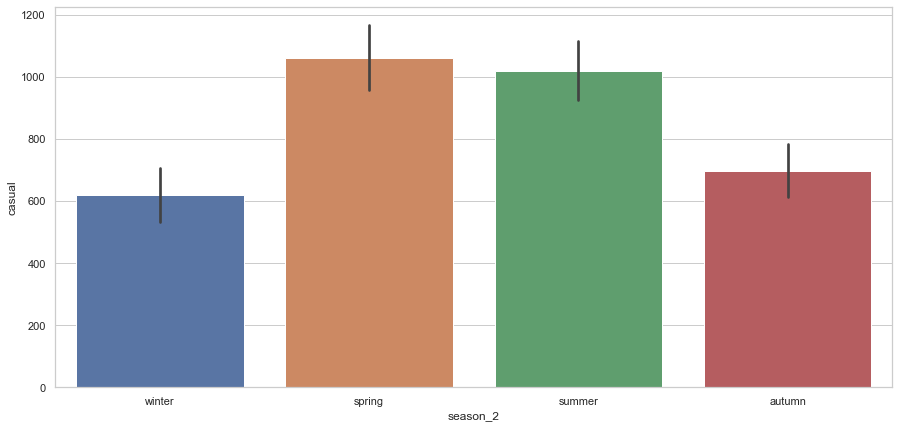

In [9]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season_2", y="casual", data=df_bike)

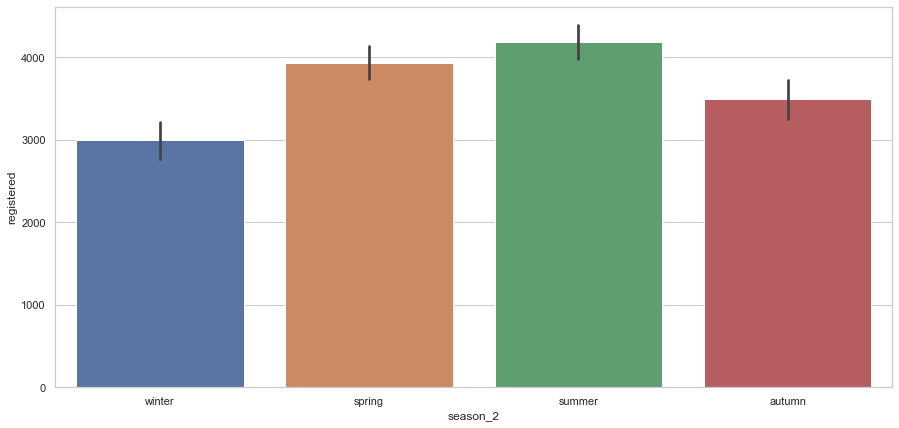

In [10]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season_2", y="registered", data=df_bike)

 - Parece que el uso de bicicletas por parte de suscriptores se mantiene algo más lineal durante las cuatro estaciones, aunque en primavera y verano se sigue utilizando más el servicio. Se aprecia una diferencia mayor en usuarios casuales.

Codificamos la columna windspeed.
 - Primero redondeamos los números a uno para que sea más fácil trabajar con los números.
 - Después haremos un bucle for en el que se vayan iterando cada fila de la columna windspeed para que se cambie el valor original por el del código elegido.
 En este caso será: https://lainakai.com/la-fuerza-del-viento/
 - La medida que utilizaremos para medir el tiempo es el km/h

In [11]:
df_bike.windspeed = df_bike.windspeed.round(1)

In [12]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.7,331,654,985,winter
1,2,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.7,131,670,801,winter
2,3,2018-03-01,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.6,120,1229,1349,winter
3,4,2018-04-01,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.7,108,1454,1562,spring
4,5,2018-05-01,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.5,82,1518,1600,spring


 - Dividimos en varios rangos la columna de windspeed utilizando el método 'get dummies'.

In [13]:
df_bike['wind_interval'] = pd.cut(df_bike['windspeed'], 5, labels=["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [14]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,wind_interval
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.7,331,654,985,winter,low
1,2,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.7,131,670,801,winter,medium
2,3,2018-03-01,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.6,120,1229,1349,winter,medium
3,4,2018-04-01,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.7,108,1454,1562,spring,low
4,5,2018-05-01,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.5,82,1518,1600,spring,low


In [15]:
df_bike['wind_interval'] = df_bike['wind_interval'].astype('object')

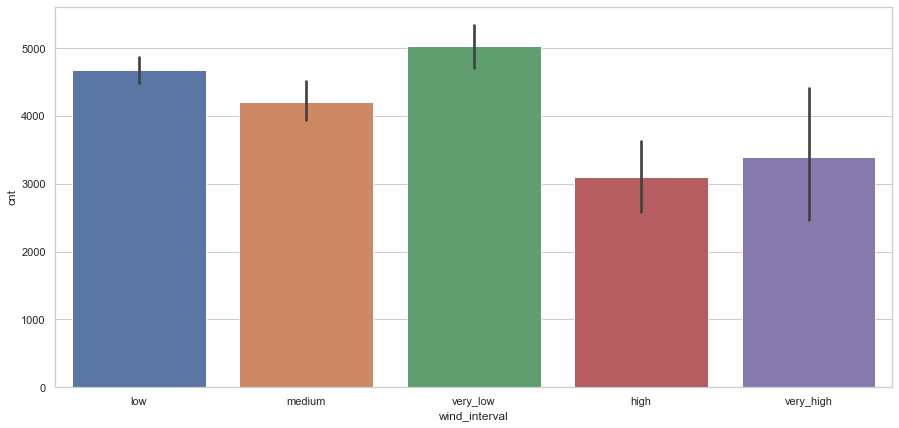

In [16]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="wind_interval", y="cnt", data=df_bike)

### Ordinal encoding

In [17]:
scale_mapper = {"very low":0, "low":1, "medium":2, 'high':3, 'very high':4}

df_bike['wind_num_encoding'] = df_bike["wind_interval"].replace(scale_mapper)

In [19]:
scale_mapper = {"winter":1, "spring":1, "summer":2, 'autumn':3}

df_bike['season_encoding'] = df_bike["season"].replace(scale_mapper)